# EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

Data can be accessed from this google drive link. The "play log" contains the records of users active session. There are 9 mini games inside the app "Lengbear", an social casino games made and publish exclusively for Cambodia. The transactions log is the records of user in app purchase.

In [2]:
# Load the transactions log data

transactions_df=pd.read_csv('data/transactions.csv', index_col=0, infer_datetime_format=True)
transactions_df

,UserID,Amount,Chips,Date,Channel
0,4403840,0.5,600000,2020-03-04 00:00:09.270,DCB_Smart_Axiata
1,4209368,1.0,2000000,2020-03-04 00:01:07.777,Wing
2,4627993,0.2,200000,2020-03-04 00:01:15.257,DCB_Smart_Axiata
3,4689823,0.2,200000,2020-03-04 00:01:53.540,DCB_Smart_Axiata
4,5209800,0.2,200000,2020-03-04 00:02:11.197,DCB_Smart_Axiata
...,...,...,...,...,...
342539,5903879,0.5,600000,2020-05-13 23:58:34.207,DCB_Smart_Axiata
342540,6094883,0.5,600000,2020-05-13 23:58:46.147,DCB_Smart_Axiata
342541,6037556,1.0,1200000,2020-05-13 23:58:53.087,DCB_Metfone_Coda
342542,6027053,0.2,200000,2020-05-13 23:59:18.517,DCB_Smart_Axiata


In [3]:
# Check if there is any missing values

transactions_df.isna().sum()

UserID     0
Amount     0
Chips      0
Date       0
Channel    0
dtype: int64

In [4]:
# Inspect the columns and datatype

transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342544 entries, 0 to 342543
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   UserID   342544 non-null  int64  
 1   Amount   342544 non-null  float64
 2   Chips    342544 non-null  int64  
 3   Date     342544 non-null  object 
 4   Channel  342544 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 15.7+ MB


In [5]:
# Slice away the purchasing time for date in transaction data

transactions_df['Date']=pd.to_datetime(transactions_df['Date'].str[:10])
transactions_df

,UserID,Amount,Chips,Date,Channel
0,4403840,0.5,600000,2020-03-04,DCB_Smart_Axiata
1,4209368,1.0,2000000,2020-03-04,Wing
2,4627993,0.2,200000,2020-03-04,DCB_Smart_Axiata
3,4689823,0.2,200000,2020-03-04,DCB_Smart_Axiata
4,5209800,0.2,200000,2020-03-04,DCB_Smart_Axiata
...,...,...,...,...,...
342539,5903879,0.5,600000,2020-05-13,DCB_Smart_Axiata
342540,6094883,0.5,600000,2020-05-13,DCB_Smart_Axiata
342541,6037556,1.0,1200000,2020-05-13,DCB_Metfone_Coda
342542,6027053,0.2,200000,2020-05-13,DCB_Smart_Axiata


In [6]:
transactions_df_sum=pd.DataFrame(transactions_df.groupby('Date').sum()['Amount']).reset_index()
transactions_df_sum['Day']=pd.to_datetime(transactions_df_sum['Date']).dt.day_name()
transactions_df_sum

,Date,Amount,Day
0,2020-03-04,6412.86,Wednesday
1,2020-03-05,5419.21,Thursday
2,2020-03-06,6745.30,Friday
3,2020-03-07,6040.70,Saturday
4,2020-03-08,7039.80,Sunday
...,...,...,...
66,2020-05-09,4730.20,Saturday
67,2020-05-10,4447.30,Sunday
68,2020-05-11,4923.70,Monday
69,2020-05-12,4781.60,Tuesday


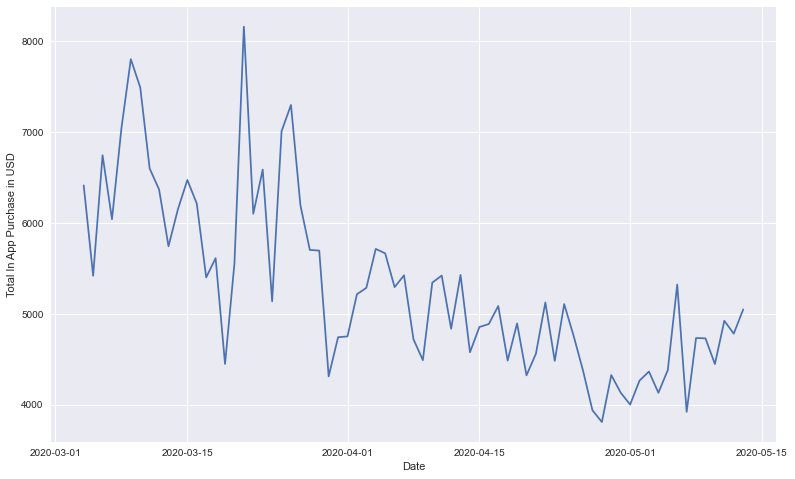

In [9]:
plt.figure(figsize=(13,8))
sns.lineplot(transactions_df_sum['Date'], transactions_df_sum['Amount'], sizes=(13,8))
plt.ylabel('Total In App Purchase in USD')
plt.savefig('IAP by data.png', dpi=400)
plt.show()

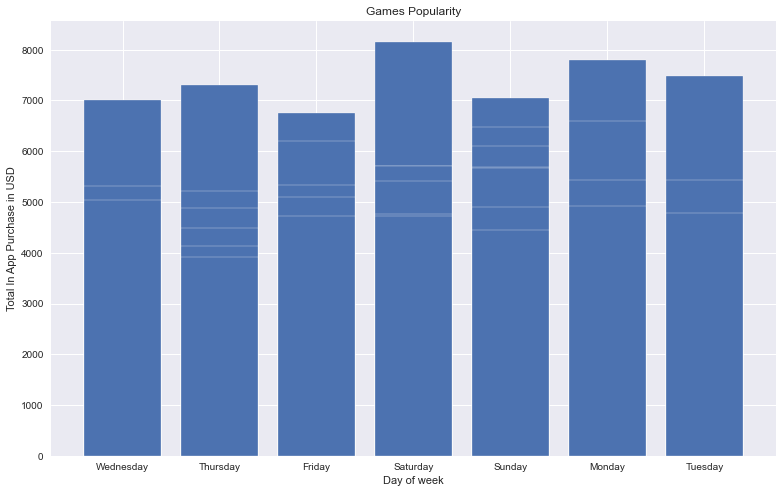

In [12]:
plt.figure(figsize=(13,8))
plt.bar(transactions_df_sum['Day'], transactions_df_sum['Amount'])
plt.xlabel('Day of week')
plt.ylabel('Total In App Purchase in USD')
plt.title('Games Popularity')
plt.show()

In [13]:
transactions_df['Channel'].value_counts()

DCB_Smart_Axiata     226264
DCB_Cellcard_Coda     70179
Wing                  35917
Wing_Local             5712
DCB_Metfone_Coda       2941
Asia                   1052
Pipay                   478
DCB_Unitel                1
Name: Channel, dtype: int64

In [18]:
transactions_iap_by_channels=transactions_df.groupby('Channel').sum()['Amount'].reset_index()
transactions_iap_by_channels.sort_values(by=['Amount'], ascending=False)
transactions_iap_by_channels

,Channel,Amount
0,Asia,2886.00
1,DCB_Cellcard_Coda,65953.20
2,DCB_Metfone_Coda,3277.50
3,DCB_Smart_Axiata,162931.61
4,DCB_Unitel,0.23
5,Pipay,1592.00
6,Wing,114243.00
7,Wing_Local,25946.59


In [ ]:
plt.figure(figsize=(13,8))
valueshow()

In [ ]:
# Columns name for player log provided by data owner

columns_play_log=('Sequence','UserID', 'GameID', 'Level', 'WinNo', 'DrawNo', 'LostNo', 'WinAmt', 'LostAmt', 'Date', 'Currency_Type1', 'Currency_Type2')


In [ ]:
# Making the dataframe for GameID and Match_Length (data provided by game owner)

# Gamename BINH                9001: 80 seconds
# Gamename POKDENG             9002: 80 seconds
# Gamename BAUCUA              9005: 20 seconds
# Gamename SHOW                9004: 80 seconds
# Gamename XOCDIA              9003: 20 seconds
# Gamename SIKU                9006: 80 seconds
# Gamename SLOT_20_LINE        9008: 20 seconds
# Gamename SLOT_100_LINE       1008: 20 seconds
# Gamename TIENLEN_CAM         9009: 120 seconds

Game_Code_Length=pd.DataFrame({'GameID':[9001, 9002, 9005, 9004, 9003, 9006, 9008, 1008, 9009],
                               'Match_Length':[75,75,20,75,20,75,20,20,120]})

In [ ]:
# Load the play log file and check if there is any missing values

play_log_df=pd.read_csv('data/PlayerLog.csv', names=columns_play_log, infer_datetime_format=True)
play_log_df.isna().sum()
play_log_df.to_csv('data/playlog01-130520.csv')

In [ ]:
# Remove redundant columns (suggested by data owner) and set the time to regular format

play_log_df.drop(['Sequence', 'DrawNo', 'Currency_Type1', 'Currency_Type2'], axis=1, inplace=True)
play_log_df['Date']=pd.to_datetime(play_log_df['Date'].str[:10])
play_log_df.head()

In [ ]:
# Getting the Match_Length column ready to calculate the active session of user.

play_log_df=play_log_df.merge(Game_Code_Length, on='GameID', how='left')
play_log_df.head()

In [ ]:
# Counting the number of games play in each log and get the actual active play time of users.

play_log_df['Games_Played']=play_log_df['WinNo']+play_log_df['DrawNo']+play_log_df['LostNo']
play_log_df['Active_Time']=play_log_df['Games_Played']*play_log_df['Match_Length']
play_log_df

In [ ]:
# Prepare to count number of minigames that user play over the period

play_log_df['9001']=np.where(play_log_df['GameID']==9001, play_log_df['Games_Played'], 0)
play_log_df['9002']=np.where(play_log_df['GameID']==9002, play_log_df['Games_Played'], 0)
play_log_df['9005']=np.where(play_log_df['GameID']==9005, play_log_df['Games_Played'], 0)
play_log_df['9004']=np.where(play_log_df['GameID']==9004, play_log_df['Games_Played'], 0)
play_log_df['9003']=np.where(play_log_df['GameID']==9003, play_log_df['Games_Played'], 0)
play_log_df['9006']=np.where(play_log_df['GameID']==9006, play_log_df['Games_Played'], 0)
play_log_df['9008']=np.where(play_log_df['GameID']==9008, play_log_df['Games_Played'], 0)
play_log_df['1008']=np.where(play_log_df['GameID']==1008, play_log_df['Games_Played'], 0)
play_log_df['9009']=np.where(play_log_df['GameID']==9009, play_log_df['Games_Played'], 0)
play_log_df.head()

In [ ]:
play_log_df.describe()

In [ ]:
# Since there is no Draw match, we drop the DrawNo as a feature

play_log_df=play_log_df.drop(['DrawNo'], axis=1)
play_log_df.head()

In [ ]:
# Count the number of games played by GameID over the study period

games_played_breakdown=play_log_df.groupby(['UserID']).sum()[['9001', '9002', '9005', '9004', '9003', '9006', '9008', '1008', '9009']].reset_index()
games_played=pd.DataFrame(games_played_breakdown[['9001', '9002', '9005', '9004', '9003', '9006', '9008', '1008', '9009']].sum()).reset_index()
games_played.columns=('GameID',"Games_Played")
games_played=games_played.sort_values(by=['Games_Played'], ascending=False)
games_played

In [ ]:
plt.figure(figsize=(13,8))
plt.bar(games_played['GameID'], games_played['Games_Played'])
plt.xlabel('Game ID')
plt.ylabel('Games Played')
plt.title('Games Popularity')
plt.show()

# Clearly GameId: 9009, 9008, 1008 and 9002 are the ones that has the most number of matches played. It is probably where users spend most of their time playing too. If any promotion banner is to take place, it should be paid extra attention. 

In [ ]:


players_details=play_log_df.groupby(['UserID']).sum()[['WinNo', 'LostNo', 'WinAmt', 'LostAmt','Active_Time', 'Games_Played', '9001', '9002', '9005', '9004', '9003', '9006', '9008', '1008', '9009']].reset_index()
players_details

In [ ]:
# Getting t0 and list of days on which user data can be extracted

t0=play_log_df['Date'].min()
t_value=[]

for i in range(0,9):
    t_value.append(t0+datetime.timedelta(days=i))
    
print(f'The data set can have t0 can start from: {t_value[0]}, to: {t_value[-1]}, pass t_value[number] to function get_data to get the desired player data')

In [ ]:
def get_data(t0):
    
    # Pass in t0, t4 and tchurn
    t0=t0
    t4=t0+datetime.timedelta(days=3)
    tchurn=t0+datetime.timedelta(days=4)
    print(f't0={t0} \nt4={t4} \ntchurn={tchurn}')
    
    # Get unique users on t0
    play_log_t0=play_log_df.loc[play_log_df['Date']==t0]
    t0_users=pd.DataFrame(play_log_t0['UserID'].unique())
    t0_users.columns=['UserID']
    
    # Slice out the dataframe that contains user playlog from t0 -> t4
    play_log_t0_t4=play_log_df.loc[(play_log_df['Date']>=t0) & (play_log_df['Date']<=t4)]
    
    # Compute the Winning rate and Drawing rate, Losing Rate, Winning Amount, Losing Amount for each user in from t0->t4
    WinNo=pd.DataFrame(play_log_t0_t4.groupby(['UserID']).sum()['WinNo'])
    LostNo=pd.DataFrame(play_log_t0_t4.groupby(['UserID']).sum()['LostNo'])
    WinAmt=pd.DataFrame(play_log_t0_t4.groupby(['UserID']).sum()['WinAmt'])
    LostAmt=pd.DataFrame(play_log_t0_t4.groupby(['UserID']).sum()['LostAmt'])
    Games_Played=pd.DataFrame(play_log_t0_t4.groupby(['UserID']).sum()['Games_Played'])
    Active_Time=pd.DataFrame(play_log_t0_t4.groupby(['UserID']).sum()['Active_Time'])
    
    # Count the number of games played by GameID over the study period
    games_played_breakdown=play_log_df.groupby(['UserID']).sum()[['9001', '9002', '9005', '9004', '9003', '9006', '9008', '1008', '9009']].reset_index()
        
    # Merging user data into a single dataframe 
    play_log_summary=WinNo.merge(LostNo, on='UserID', how='left')\
                        .merge(WinAmt, on='UserID', how='left')\
                        .merge(LostAmt, on='UserID', how='left')\
                        .merge(Games_Played, on='UserID', how='left')\
                        .merge(Active_Time, on='UserID', how='left')
    play_log_summary.columns=['WinNo', 'LostNo', 'WinAmt', 'LostAmt', 'Games_Played', 'Active_Time']
    
    # Reset index after merging all new 
    play_log_summary=play_log_summary.reset_index(level='UserID')
        
    # Slice out the time for study
    transactions_df_t0_t4=transactions_df.loc[(transactions_df['Date']>=t0) & (transactions_df['Date']<=t4)]
    
    # Sum in-game purchase by users during t0 -> t4
    transactions_df_t0_t4=pd.DataFrame(transactions_df_t0_t4.groupby(['UserID']).sum()['Amount'])
    transactions_df_t0_t4.reset_index(level='UserID')
    
    # Merge transactions records with play log
    play_log_summary=play_log_summary.merge(transactions_df_t0_t4, on='UserID', how='left')
    play_log_summary=play_log_summary.fillna(0)
    
    # Create new features namely: Winning Rate, Drawing Rate, Losing Rate for all unique users
    play_log_summary['WinningRate']=play_log_summary['WinNo']/play_log_summary['Games_Played']
    play_log_summary['LosingRate']=play_log_summary['LostNo']/play_log_summary['Games_Played']
    
    # Slice out tchurn
    play_log_tchurn=play_log_df.loc[play_log_df['Date']==tchurn]
    
    # Getting target 
    final_play_log=play_log_summary.assign(Churn=play_log_summary.UserID.isin(play_log_tchurn.UserID).astype(int))

    return final_play_log

In [ ]:
play_log_train=get_data(t_value[0])
play_log_train

# Correlation with churn

In [ ]:
play_log_df.corr().style.background_gradient()

In [ ]:
# Assigning X_train and y_train
X_train=play_log_train.iloc[:,:-1]
X_train=X_train.drop(['UserID'], axis=1)

# Fill na for some value of 
X_train=X_train.fillna(0) 
X_train.shape

In [ ]:
y_train=play_log_train.iloc[:,-1]

In [ ]:
y_train.value_counts()

## Clearly, this is an imbalance data set which can result in inaccuracy for classification models. We will resample the data sets to make it more balance.

In [ ]:
from sklearn.utils import resample

In [ ]:

print('Number of class 0 examples before:', X_train[y_train == 0].shape[0])

X_downsampled, y_downsampled = resample(X_train[y_train == 0], 
                                        y_train[y_train == 0], 
                                        replace=True, 
                                        n_samples=X_train[y_train == 1].shape[0], 
                                        random_state=42)

print('Number of class 0 examples after:', X_downsampled.shape[0])

# Combine upsample with original data
X_train_downsampled = np.vstack((X_train[y_train == 1], X_downsampled))
y_train_downsampled = np.hstack((y_train[y_train == 1], y_downsampled))

In [ ]:
# Get a new set of users as the test set 

play_log_test=get_data(t_value[6])
play_log_test

In [ ]:
# Assigning X_test and y_test
X_test=play_log_test.iloc[:,:-1]
X_test=X_test.drop(['UserID'], axis=1)

# Fill na for some value of 
X_test=X_test.fillna(0) 

In [ ]:
y_test=play_log_test.iloc[:,-1]
y_test.value_counts()

In [ ]:
from sklearn.linear_model import LogisticRegression

# 1. Instantiate model
churn_logistic_regression=LogisticRegression(random_state=42, max_iter=10000)

# 2. Fit model
churn_logistic_regression.fit(X_train_downsampled, y_train_downsampled)

In [ ]:
# 3. Score model
print(f'Score on train: {churn_logistic_regression.score(X_train_downsampled, y_train_downsampled)}')
print(f'Score on test: {churn_logistic_regression.score(X_test, y_test)}')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier(random_state=42, max_depth=11)
DT.fit(X_train, y_train)

# Accuracy scores
print(DT.score(X_train_downsampled, y_train_downsampled))
print(DT.score(X_test, y_test))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# k_ranges = range(1,15)
# train_scores = []
# validation_scores = []

# for k in k_ranges:
my_knn = KNeighborsClassifier(n_neighbors=13)
my_knn.fit(X_train, y_train)
    
# train_scores.append(my_knn.score(X_train, y_train))
# validation_scores.append(my_knn.score(X_test, y_test))

print(my_knn.score(X_train_downsampled, y_train_downsampled))
print(my_knn.score(X_test, y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

estimator_number = list(range(1, 100))
train_scores = []
test_scores = []


for number in estimator_number:
    my_model = RandomForestClassifier(n_estimators=number, 
                                      max_depth=1,
                                      random_state=1)
    my_model.fit(X_train_downsampled, y_train_downsampled)

    train_scores.append(my_model.score(X_train_downsampled, y_train_downsampled))
    test_scores.append(my_model.score(X_test, y_test))
    
    print(f'finished {number} estimators', end='\r')

In [ ]:
plt.figure()
plt.plot(estimator_number, train_scores, label="Train")
plt.plot(estimator_number, test_scores, label="Test")
plt.xlabel("Estimator number")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
my_skl_model = MLPClassifier(hidden_layer_sizes=(10), 
                             activation='relu',
                             max_iter=2000,
                             solver = 'adam')

In [ ]:
# 3. Fit
my_skl_model.fit(X_train_downsampled, y_train_downsampled)

In [ ]:
# 3. Score
print(my_skl_model.score(X_train_downsampled, y_train_downsampled))
print(my_skl_model.score(X_test, y_test))

In [ ]:
# importing the feed-forward network object
from tensorflow.keras.models import Sequential

# importing the required type of layers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [ ]:
# Instantiate feed-forward neural network
my_keras_model = Sequential()

In [ ]:
# adding appropriate layers

# hidden layer with relu activation function and 10 nodes
my_keras_model.add(Dense(units=10, 
                         activation='relu', 
                         input_shape=(11,))) 
# shape of data points come in the model
# the next layer you dont need to put in input_shape
# output layer with softmax and 3 output nodes
my_keras_model.add(Dense(units=2,
                         activation='softmax')) #classification problem use softmax

In [ ]:
# compile model with proper optimizer, loss and a metric
my_keras_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy']) #loss function is what we want to optimize

In [ ]:
# fit model 
my_keras_model.fit(X_train_downsampled, y_train_downsampled, epochs=2000, verbose=0) 
# epoch is the number of iteration, 
# verbose stops the function printing everytime it finishes one iteration 

In [ ]:
# training score
my_keras_model.evaluate(X_train_downsampled, y_train_downsampled)

In [ ]:
# testing score
my_keras_model.evaluate(X_test, y_test)